In [1]:
N <- 20

In [2]:
SPAN <- 60

In [3]:
TREND <- 0.5

In [4]:
generate_ts <- function(m, label) {
     library(dplyr)
     # ランダムな AR 成分を追加
     .add.ar <- function(x) {
         x + arima.sim(n = SPAN, list(ar = runif(2, -0.5, 0.5)))
     }
     # 平均が偏った 乱数を cumsum してトレンドとする
     d <- matrix(rnorm(SPAN * N, mean = m, sd = 1), ncol = N) %>%
         data.frame() %>%
         cumsum()
     d <- apply(d, 2, .add.ar) %>%
         data.frame()
     colnames(d) <- paste0(label, seq(1, N))
     d
 }

In [5]:
set.seed(101)
group1 <- generate_ts(TREND, label = 'U')

set.seed(102)
group2 <- generate_ts(0, label = 'N')

set.seed(103)
group3 <- generate_ts(-TREND, label = 'D')

set.seed(104)
group4 <- generate_ts(0, label = 'S1_')
group4 <- group4 + 5*sin(seq(0, 4*pi, length.out = SPAN))

set.seed(105)
group5 <- generate_ts(0, label = 'S2_')
group5 <- group5 + 5*sin(seq(0, 8*pi, length.out = SPAN))

data <- cbind(group1, group2, group3, group4, group5)
data <- as.data.frame(data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




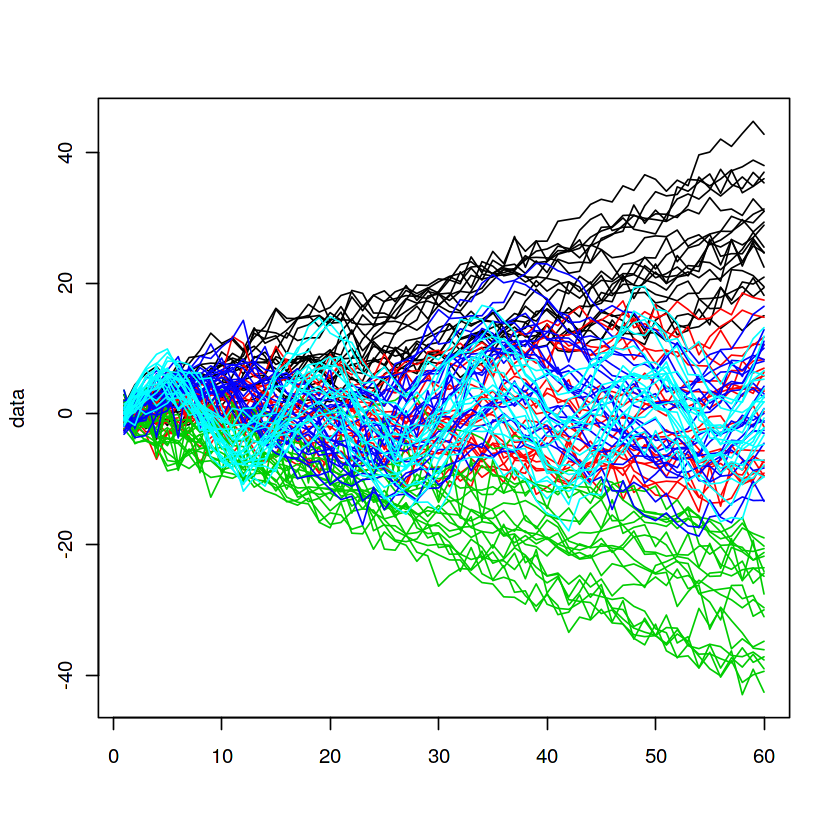

In [6]:
matplot(data, type = 'l', lty = 1, col = c(rep(1,20), rep(2,20), rep(3,20), rep(4,20), rep(5,20)))
true.cluster <- c(rep(1,20), rep(2,20), rep(3,20), rep(4,20), rep(5,20))

In [7]:
write.csv(data, "./data.csv")


In [8]:
install.packages('TSclust')
library(TSclust)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: pdc

Loading required package: cluster

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



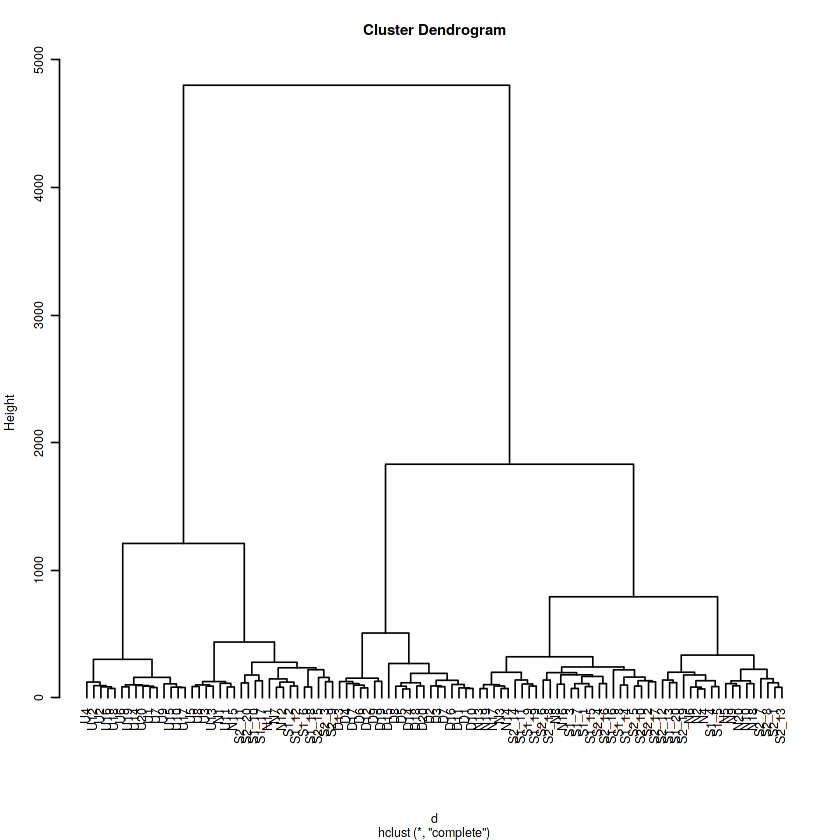

In [9]:
# DTW 距離で距離行列を作成
d <- diss(data, "DTWARP")
# hclust は既定で実行 = 最遠隣法
h <- hclust(d)
par(cex=0.6)
plot(h, hang = -1)

In [10]:
# クラスタ数は ５ とする
clusters <- cutree(h, 5)
# 正分類率の算出
cluster.evaluation(rep(c(1, 2, 3, 4, 5), rep(N, 5)), clusters)

[1] 0.6208565

In [11]:
clusters

U1    U2    U3    U4    U5    U6    U7    U8    U9   U10   U11   U12   U13 
    1     1     2     1     2     1     1     2     1     1     2     1     2 
  U14   U15   U16   U17   U18   U19   U20    N1    N2    N3    N4    N5    N6 
    1     1     1     1     1     1     1     2     3     4     3     3     3 
   N7    N8    N9   N10   N11   N12   N13   N14   N15   N16   N17   N18   N19 
    2     4     3     3     2     2     4     4     2     4     4     3     4 
  N20    D1    D2    D3    D4    D5    D6    D7    D8    D9   D10   D11   D12 
    3     5     5     5     5     5     5     5     5     5     5     5     5 
  D13   D14   D15   D16   D17   D18   D19   D20  S1_1  S1_2  S1_3  S1_4  S1_5 
    5     5     5     5     5     5     5     5     4     2     4     3     3 
 S1_6  S1_7  S1_8  S1_9 S1_10 S1_11 S1_12 S1_13 S1_14 S1_15 S1_16 S1_17 S1_18 
    2     4     4     4     2     4     2     3     4     4     4     2     2 
S1_19 S1_20  S2_1  S2_2  S2_3  S2_4  S2_5  S2_6  S2_7  S2_8  S2_9 S2_10 S2_11 
    4     3     3     4     2     4     4     4     3     3     2     4     2 
S2_12 S2_13 S2_14 S2_15 S2_16 S2_17 S2_18 S2_19 S2_20 
    3     3     4     2     4     4     4     3     2

In [12]:
 py <- c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 1, 1, 1, 3, 1, 1, 1, 0, 3, 3, 3, 0, 1, 3, 1, 3, 1, 2, 4, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 1, 0, 1, 1, 1, 0,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3) 

In [13]:
cluster.evaluation(rep(c(1, 2, 3, 4, 5), rep(N, 5)), py)

[1] 0.5776595